In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /gdrive
/gdrive
Mounted at /content/drive


In [2]:
class BoundingBox(object):
    """
    A 2D bounding box
    """

    def __init__(self, points):
        if len(points) == 0:
            raise ValueError("Can't compute bounding box of empty list")
        self.minx, self.miny = float("inf"), float("inf")
        self.maxx, self.maxy = float("-inf"), float("-inf")
        for point in points:
            # Set min coords
            if point['x'] < self.minx:
                self.minx = point['x']
            if point['y'] < self.miny:
                self.miny = point['y']
            # Set max coords
            if point['x'] > self.maxx:
                self.maxx = point['x']
            if point['y'] > self.maxy: #elif point['y'] > self.maxy: ('elif' caused faulty boxes) 
                self.maxy = point['y']

    @property
    def width(self):
        return self.maxx - self.minx

    @property
    def height(self):
        return self.maxy - self.miny

    def __repr__(self):
        return "BoundingBox({}, {}, {}, {})".format(
            self.minx, self.maxx, self.miny, self.maxy)

    def __eq__(self, other):
        """Overrides the default implementation"""
        if isinstance(other, BoundingBox):
            return self.minx == other.minx and self.miny == other.miny and self.maxy == other.maxy and self.maxx == other.maxx
        return False


In [4]:
import numpy as np
import json
import matplotlib.pyplot as plt

def show_freehand_with_bbox(freehand_points, bbox):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim([0,700])
    ax.set_ylim([0,700])

    freehand_x = [float(i['x']) for i in freehand_points]
    freehand_y = [float(i['y']) for i in freehand_points]
    ax.plot(freehand_x, freehand_y, color="red", linewidth=2, label="freehand")

    bbox_x = [bbox.minx, bbox.maxx, bbox.maxx, bbox.minx, bbox.minx]
    bbox_y = [bbox.miny, bbox.miny, bbox.maxy, bbox.maxy, bbox.miny]
    ax.plot(bbox_x, bbox_y, color="blue", linewidth=2, label="bbox")

    print(f'Freehand points: {freehand_points}')
    print(f'Bounding box: {bbox}')

    plt.show()


def create_bounding_box(svg_object):
    if svg_object is not None:
        svg_array = json.loads(svg_object)
        b_boxes = []
        for svg in svg_array:
            points_array = np.array(svg['points'])  # svg_points_list convert to 2d array with numpy
            b_box = BoundingBox(points_array)
            b_boxes.append(b_box)
            show_freehand_with_bbox(points_array, b_box)

        final_bbox = []
        unique_bbox = make_unique_bbox(b_boxes)
        for bbox in unique_bbox:
            temp_bbox = {
                'minx': bbox.minx,
                'miny': bbox.miny,
                'maxx': bbox.maxx,
                'maxy': bbox.maxy,
            }
            final_bbox.append(temp_bbox)

        return final_bbox


def make_unique_bbox(bounding_boxes):
    unique_bboxes = []
    for bbox in bounding_boxes:
        if bbox not in unique_bboxes:
            unique_bboxes.append(bbox)
    return unique_bboxes

Freehand points: [{'x': 154, 'y': 111} {'x': 140, 'y': 125} {'x': 134, 'y': 133}
 {'x': 132, 'y': 141} {'x': 132, 'y': 143} {'x': 132, 'y': 149}
 {'x': 134, 'y': 155} {'x': 138, 'y': 159} {'x': 139, 'y': 160}
 {'x': 139, 'y': 167} {'x': 139, 'y': 172} {'x': 139, 'y': 177}
 {'x': 148, 'y': 187} {'x': 157, 'y': 188} {'x': 165, 'y': 190}
 {'x': 187, 'y': 187} {'x': 192, 'y': 181} {'x': 194, 'y': 175}
 {'x': 195, 'y': 161} {'x': 194, 'y': 155} {'x': 194, 'y': 148}
 {'x': 194, 'y': 141} {'x': 196, 'y': 124} {'x': 193, 'y': 122}
 {'x': 186, 'y': 115} {'x': 178, 'y': 112} {'x': 171, 'y': 112}
 {'x': 163, 'y': 110} {'x': 159, 'y': 110} {'x': 149, 'y': 109}]
Bounding box: BoundingBox(132, 196, 109, 190)


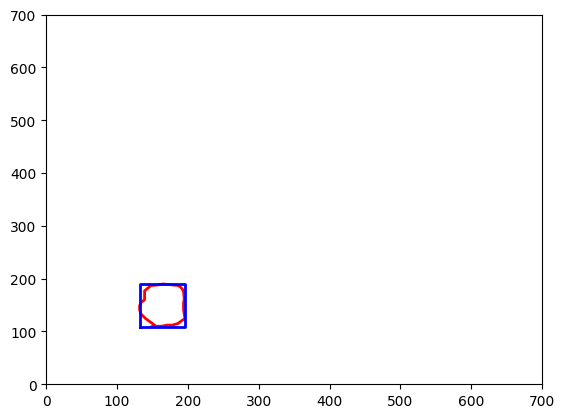

Freehand points: [{'x': 378, 'y': 122} {'x': 374, 'y': 126} {'x': 367, 'y': 137}
 {'x': 361, 'y': 147} {'x': 360, 'y': 155} {'x': 360, 'y': 161}
 {'x': 362, 'y': 170} {'x': 366, 'y': 179} {'x': 374, 'y': 183}
 {'x': 376, 'y': 183} {'x': 388, 'y': 184} {'x': 392, 'y': 187}
 {'x': 396, 'y': 187} {'x': 411, 'y': 189} {'x': 417, 'y': 185}
 {'x': 425, 'y': 181} {'x': 433, 'y': 177} {'x': 453, 'y': 167}
 {'x': 467, 'y': 150} {'x': 472, 'y': 142} {'x': 476, 'y': 136}
 {'x': 477, 'y': 130} {'x': 473, 'y': 126} {'x': 464, 'y': 120}
 {'x': 461, 'y': 116} {'x': 452, 'y': 113} {'x': 445, 'y': 112}
 {'x': 434, 'y': 114} {'x': 430, 'y': 118} {'x': 422, 'y': 120}
 {'x': 418, 'y': 120} {'x': 413, 'y': 120} {'x': 404, 'y': 121}
 {'x': 399, 'y': 121} {'x': 393, 'y': 122} {'x': 388, 'y': 122}
 {'x': 382, 'y': 123} {'x': 380, 'y': 123} {'x': 376, 'y': 123}]
Bounding box: BoundingBox(360, 477, 112, 189)


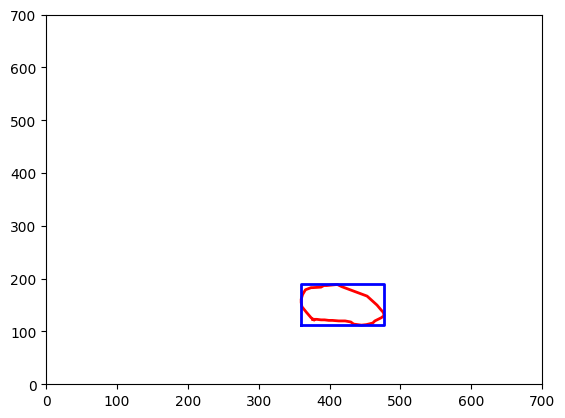

Freehand points: [{'x': 163, 'y': 67} {'x': 155, 'y': 66} {'x': 137, 'y': 75}
 {'x': 128, 'y': 83} {'x': 125, 'y': 96} {'x': 127, 'y': 104}
 {'x': 127, 'y': 109} {'x': 126, 'y': 114} {'x': 124, 'y': 117}
 {'x': 121, 'y': 133} {'x': 116, 'y': 141} {'x': 116, 'y': 150}
 {'x': 121, 'y': 156} {'x': 124, 'y': 162} {'x': 138, 'y': 179}
 {'x': 142, 'y': 184} {'x': 148, 'y': 190} {'x': 152, 'y': 194}
 {'x': 158, 'y': 204} {'x': 167, 'y': 205} {'x': 176, 'y': 205}
 {'x': 187, 'y': 202} {'x': 209, 'y': 181} {'x': 218, 'y': 172}
 {'x': 223, 'y': 169} {'x': 224, 'y': 150} {'x': 226, 'y': 129}
 {'x': 226, 'y': 122} {'x': 227, 'y': 105} {'x': 228, 'y': 101}
 {'x': 219, 'y': 95} {'x': 211, 'y': 92} {'x': 204, 'y': 86}
 {'x': 204, 'y': 83} {'x': 202, 'y': 75} {'x': 199, 'y': 72}
 {'x': 187, 'y': 72} {'x': 185, 'y': 72} {'x': 177, 'y': 69}
 {'x': 167, 'y': 67} {'x': 162, 'y': 68}]
Bounding box: BoundingBox(116, 228, 66, 205)


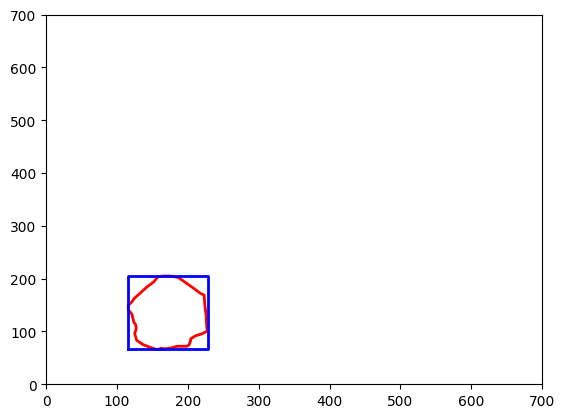

Freehand points: [{'x': 349, 'y': 70} {'x': 341, 'y': 82} {'x': 339, 'y': 92}
 {'x': 329, 'y': 119} {'x': 326, 'y': 138} {'x': 327, 'y': 145}
 {'x': 329, 'y': 150} {'x': 333, 'y': 154} {'x': 339, 'y': 159}
 {'x': 343, 'y': 164} {'x': 349, 'y': 169} {'x': 362, 'y': 177}
 {'x': 364, 'y': 177} {'x': 372, 'y': 181} {'x': 376, 'y': 186}
 {'x': 380, 'y': 188} {'x': 380, 'y': 188} {'x': 393, 'y': 194}
 {'x': 406, 'y': 191} {'x': 418, 'y': 191} {'x': 430, 'y': 189}
 {'x': 442, 'y': 185} {'x': 453, 'y': 180} {'x': 466, 'y': 167}
 {'x': 470, 'y': 163} {'x': 477, 'y': 163} {'x': 482, 'y': 163}
 {'x': 489, 'y': 158} {'x': 489, 'y': 145} {'x': 489, 'y': 141}
 {'x': 488, 'y': 137} {'x': 483, 'y': 129} {'x': 480, 'y': 126}
 {'x': 478, 'y': 114} {'x': 476, 'y': 109} {'x': 470, 'y': 104}
 {'x': 461, 'y': 100} {'x': 456, 'y': 97} {'x': 449, 'y': 90}
 {'x': 442, 'y': 85} {'x': 436, 'y': 81} {'x': 430, 'y': 75}
 {'x': 424, 'y': 70} {'x': 417, 'y': 69} {'x': 407, 'y': 69}
 {'x': 398, 'y': 69} {'x': 384, 'y

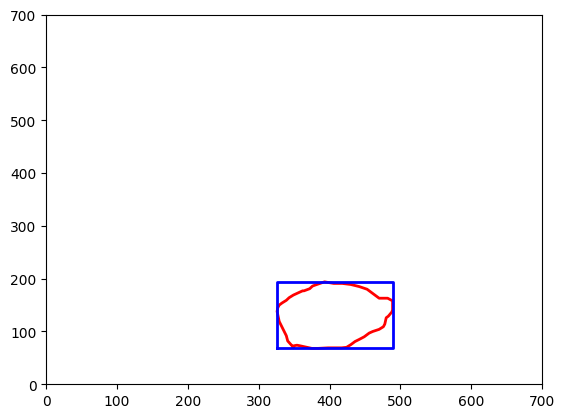

Freehand points: [{'x': 371, 'y': 87} {'x': 366, 'y': 80} {'x': 366, 'y': 67}
 {'x': 365, 'y': 62} {'x': 358, 'y': 56} {'x': 346, 'y': 53}
 {'x': 333, 'y': 52} {'x': 323, 'y': 52} {'x': 313, 'y': 55}
 {'x': 306, 'y': 59} {'x': 299, 'y': 64} {'x': 289, 'y': 65}
 {'x': 275, 'y': 62} {'x': 267, 'y': 63} {'x': 253, 'y': 67}
 {'x': 243, 'y': 73} {'x': 227, 'y': 82} {'x': 203, 'y': 99}
 {'x': 195, 'y': 109} {'x': 192, 'y': 113} {'x': 186, 'y': 120}
 {'x': 181, 'y': 130} {'x': 177, 'y': 160} {'x': 180, 'y': 168}
 {'x': 182, 'y': 176} {'x': 188, 'y': 182} {'x': 194, 'y': 190}
 {'x': 198, 'y': 196} {'x': 218, 'y': 202} {'x': 243, 'y': 209}
 {'x': 259, 'y': 219} {'x': 289, 'y': 231} {'x': 302, 'y': 236}
 {'x': 312, 'y': 238} {'x': 320, 'y': 235} {'x': 324, 'y': 232}
 {'x': 330, 'y': 222} {'x': 340, 'y': 209} {'x': 348, 'y': 197}
 {'x': 358, 'y': 188} {'x': 367, 'y': 181} {'x': 377, 'y': 175}
 {'x': 382, 'y': 165} {'x': 388, 'y': 145} {'x': 390, 'y': 136}
 {'x': 388, 'y': 130} {'x': 388, 'y': 113

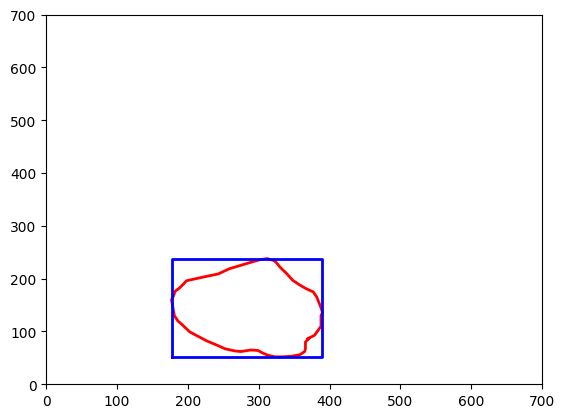

Freehand points: [{'x': 383, 'y': 105} {'x': 383, 'y': 96} {'x': 377, 'y': 82}
 {'x': 371, 'y': 77} {'x': 366, 'y': 71} {'x': 360, 'y': 62}
 {'x': 353, 'y': 58} {'x': 346, 'y': 55} {'x': 330, 'y': 52}
 {'x': 322, 'y': 48} {'x': 303, 'y': 53} {'x': 296, 'y': 59}
 {'x': 289, 'y': 63} {'x': 282, 'y': 67} {'x': 272, 'y': 70}
 {'x': 261, 'y': 75} {'x': 252, 'y': 80} {'x': 244, 'y': 82}
 {'x': 217, 'y': 98} {'x': 215, 'y': 105} {'x': 214, 'y': 115}
 {'x': 213, 'y': 135} {'x': 215, 'y': 151} {'x': 217, 'y': 157}
 {'x': 219, 'y': 161} {'x': 227, 'y': 169} {'x': 252, 'y': 184}
 {'x': 263, 'y': 185} {'x': 267, 'y': 185} {'x': 273, 'y': 183}
 {'x': 299, 'y': 175} {'x': 339, 'y': 174} {'x': 365, 'y': 175}
 {'x': 372, 'y': 165} {'x': 376, 'y': 158} {'x': 379, 'y': 151}
 {'x': 383, 'y': 146} {'x': 387, 'y': 138} {'x': 386, 'y': 130}
 {'x': 382, 'y': 121} {'x': 380, 'y': 116} {'x': 382, 'y': 104}]
Bounding box: BoundingBox(213, 387, 48, 185)


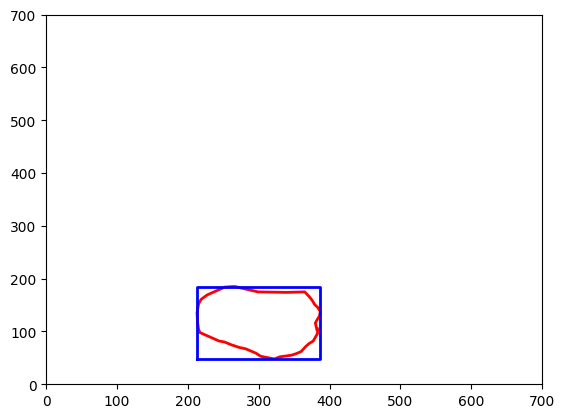

Freehand points: [{'x': 289, 'y': 37} {'x': 282, 'y': 37} {'x': 269, 'y': 37}
 {'x': 251, 'y': 38} {'x': 246, 'y': 38} {'x': 232, 'y': 40}
 {'x': 220, 'y': 43} {'x': 208, 'y': 44} {'x': 196, 'y': 48}
 {'x': 189, 'y': 48} {'x': 188, 'y': 49} {'x': 181, 'y': 56}
 {'x': 171, 'y': 63} {'x': 166, 'y': 69} {'x': 160, 'y': 76}
 {'x': 160, 'y': 77} {'x': 157, 'y': 86} {'x': 156, 'y': 92}
 {'x': 155, 'y': 100} {'x': 152, 'y': 111} {'x': 150, 'y': 116}
 {'x': 152, 'y': 144} {'x': 153, 'y': 155} {'x': 153, 'y': 161}
 {'x': 152, 'y': 175} {'x': 153, 'y': 189} {'x': 154, 'y': 202}
 {'x': 156, 'y': 204} {'x': 163, 'y': 212} {'x': 168, 'y': 231}
 {'x': 186, 'y': 249} {'x': 196, 'y': 259} {'x': 198, 'y': 263}
 {'x': 214, 'y': 275} {'x': 228, 'y': 282} {'x': 236, 'y': 283}
 {'x': 253, 'y': 285} {'x': 262, 'y': 285} {'x': 285, 'y': 286}
 {'x': 295, 'y': 287} {'x': 322, 'y': 287} {'x': 342, 'y': 287}
 {'x': 361, 'y': 288} {'x': 365, 'y': 288} {'x': 372, 'y': 289}
 {'x': 396, 'y': 287} {'x': 402, 'y': 285

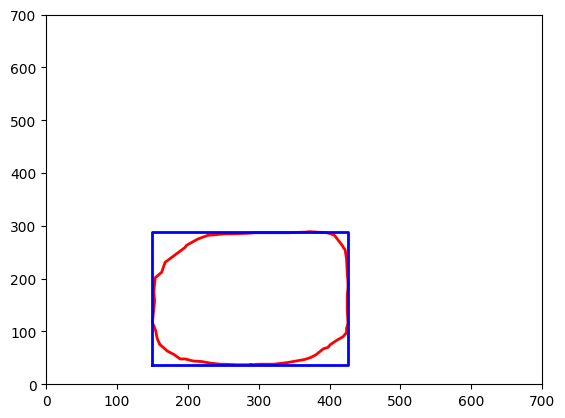

Freehand points: [{'x': 269, 'y': 57} {'x': 296, 'y': 54} {'x': 303, 'y': 53}
 {'x': 314, 'y': 53} {'x': 327, 'y': 51} {'x': 348, 'y': 51}
 {'x': 382, 'y': 58} {'x': 418, 'y': 83} {'x': 419, 'y': 84}
 {'x': 422, 'y': 100} {'x': 419, 'y': 112} {'x': 415, 'y': 126}
 {'x': 412, 'y': 140} {'x': 399, 'y': 162} {'x': 393, 'y': 174}
 {'x': 370, 'y': 179} {'x': 356, 'y': 181} {'x': 325, 'y': 179}
 {'x': 315, 'y': 179} {'x': 294, 'y': 179} {'x': 283, 'y': 180}
 {'x': 263, 'y': 177} {'x': 254, 'y': 175} {'x': 248, 'y': 171}
 {'x': 239, 'y': 166} {'x': 231, 'y': 160} {'x': 227, 'y': 152}
 {'x': 222, 'y': 140} {'x': 218, 'y': 131} {'x': 217, 'y': 121}
 {'x': 214, 'y': 114} {'x': 213, 'y': 109} {'x': 211, 'y': 98}
 {'x': 215, 'y': 92} {'x': 220, 'y': 80} {'x': 228, 'y': 72}
 {'x': 234, 'y': 68} {'x': 252, 'y': 59} {'x': 257, 'y': 59}
 {'x': 262, 'y': 59} {'x': 266, 'y': 59} {'x': 268, 'y': 58}]
Bounding box: BoundingBox(211, 422, 51, 181)


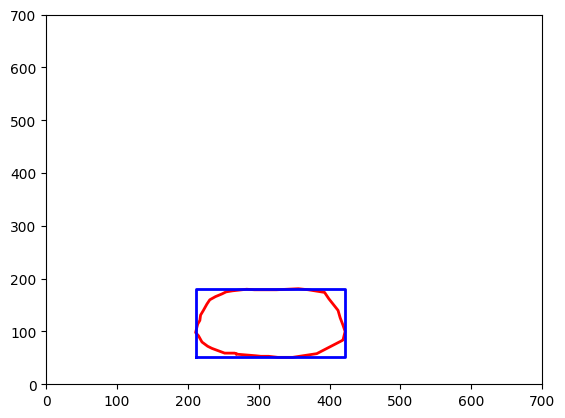

Freehand points: [{'x': 412, 'y': 56} {'x': 402, 'y': 56} {'x': 377, 'y': 60}
 {'x': 368, 'y': 65} {'x': 362, 'y': 72} {'x': 360, 'y': 78}
 {'x': 358, 'y': 87} {'x': 357, 'y': 87} {'x': 365, 'y': 118}
 {'x': 367, 'y': 124} {'x': 368, 'y': 134} {'x': 378, 'y': 158}
 {'x': 390, 'y': 181} {'x': 408, 'y': 188} {'x': 428, 'y': 188}
 {'x': 438, 'y': 185} {'x': 446, 'y': 183} {'x': 455, 'y': 179}
 {'x': 462, 'y': 170} {'x': 464, 'y': 168} {'x': 469, 'y': 154}
 {'x': 471, 'y': 143} {'x': 475, 'y': 131} {'x': 477, 'y': 118}
 {'x': 477, 'y': 112} {'x': 476, 'y': 102} {'x': 473, 'y': 93}
 {'x': 469, 'y': 81} {'x': 466, 'y': 78} {'x': 460, 'y': 74}
 {'x': 452, 'y': 67} {'x': 450, 'y': 64} {'x': 445, 'y': 61}
 {'x': 440, 'y': 60} {'x': 435, 'y': 58} {'x': 428, 'y': 58}
 {'x': 417, 'y': 57} {'x': 414, 'y': 57} {'x': 411, 'y': 57}]
Bounding box: BoundingBox(357, 477, 56, 188)


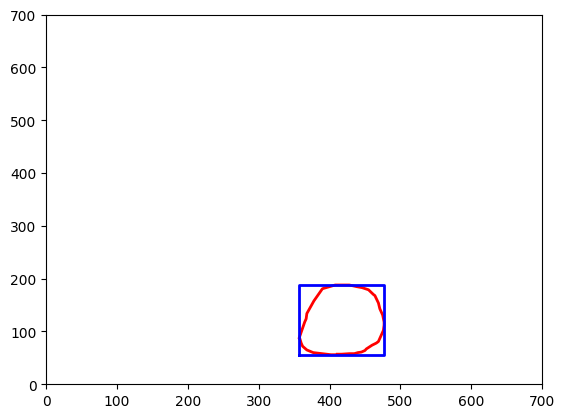

Freehand points: [{'x': 171, 'y': 46} {'x': 157, 'y': 53} {'x': 146, 'y': 61}
 {'x': 134, 'y': 72} {'x': 127, 'y': 79} {'x': 117, 'y': 87}
 {'x': 105, 'y': 103} {'x': 103, 'y': 110} {'x': 109, 'y': 135}
 {'x': 112, 'y': 138} {'x': 137, 'y': 152} {'x': 146, 'y': 156}
 {'x': 149, 'y': 161} {'x': 156, 'y': 167} {'x': 165, 'y': 169}
 {'x': 191, 'y': 168} {'x': 194, 'y': 168} {'x': 211, 'y': 154}
 {'x': 218, 'y': 145} {'x': 225, 'y': 138} {'x': 229, 'y': 137}
 {'x': 231, 'y': 137} {'x': 243, 'y': 137} {'x': 248, 'y': 136}
 {'x': 255, 'y': 114} {'x': 255, 'y': 104} {'x': 252, 'y': 96}
 {'x': 243, 'y': 88} {'x': 240, 'y': 83} {'x': 238, 'y': 70}
 {'x': 229, 'y': 64} {'x': 223, 'y': 63} {'x': 217, 'y': 61}
 {'x': 213, 'y': 56} {'x': 207, 'y': 53} {'x': 201, 'y': 53}
 {'x': 193, 'y': 49} {'x': 188, 'y': 48} {'x': 176, 'y': 46}
 {'x': 175, 'y': 46} {'x': 168, 'y': 46}]
Bounding box: BoundingBox(103, 255, 46, 169)


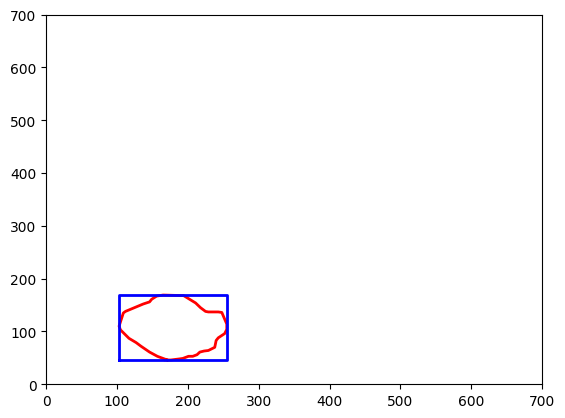

Freehand points: [{'x': 326, 'y': 70} {'x': 320, 'y': 62} {'x': 306, 'y': 57}
 {'x': 300, 'y': 57} {'x': 277, 'y': 60} {'x': 269, 'y': 63}
 {'x': 264, 'y': 64} {'x': 260, 'y': 68} {'x': 257, 'y': 76}
 {'x': 257, 'y': 81} {'x': 257, 'y': 85} {'x': 258, 'y': 98}
 {'x': 264, 'y': 108} {'x': 266, 'y': 112} {'x': 271, 'y': 116}
 {'x': 276, 'y': 118} {'x': 280, 'y': 120} {'x': 281, 'y': 120}
 {'x': 288, 'y': 125} {'x': 295, 'y': 129} {'x': 305, 'y': 131}
 {'x': 308, 'y': 131} {'x': 316, 'y': 130} {'x': 325, 'y': 123}
 {'x': 334, 'y': 121} {'x': 340, 'y': 112} {'x': 341, 'y': 107}
 {'x': 344, 'y': 85} {'x': 339, 'y': 80} {'x': 331, 'y': 73}
 {'x': 325, 'y': 70}]
Bounding box: BoundingBox(257, 344, 57, 131)


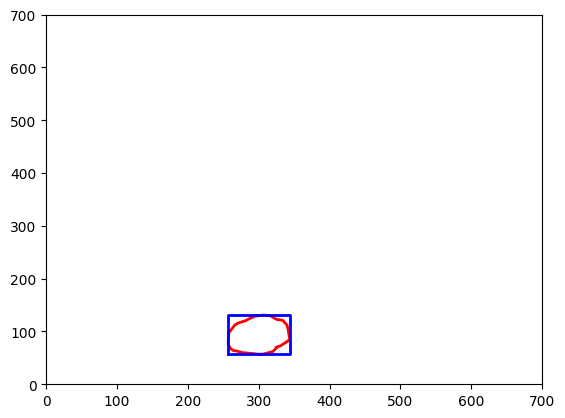

Freehand points: [{'x': 332, 'y': 100} {'x': 328, 'y': 100} {'x': 320, 'y': 109}
 {'x': 310, 'y': 114} {'x': 303, 'y': 120} {'x': 300, 'y': 129}
 {'x': 299, 'y': 133} {'x': 298, 'y': 140} {'x': 305, 'y': 155}
 {'x': 310, 'y': 158} {'x': 315, 'y': 163} {'x': 319, 'y': 165}
 {'x': 323, 'y': 167} {'x': 337, 'y': 168} {'x': 342, 'y': 168}
 {'x': 348, 'y': 168} {'x': 367, 'y': 164} {'x': 372, 'y': 161}
 {'x': 378, 'y': 157} {'x': 385, 'y': 142} {'x': 385, 'y': 133}
 {'x': 384, 'y': 127} {'x': 382, 'y': 119} {'x': 378, 'y': 115}
 {'x': 374, 'y': 110} {'x': 368, 'y': 105} {'x': 360, 'y': 101}
 {'x': 357, 'y': 100} {'x': 349, 'y': 100} {'x': 340, 'y': 99}
 {'x': 336, 'y': 99} {'x': 334, 'y': 99} {'x': 331, 'y': 100}]
Bounding box: BoundingBox(298, 385, 99, 168)


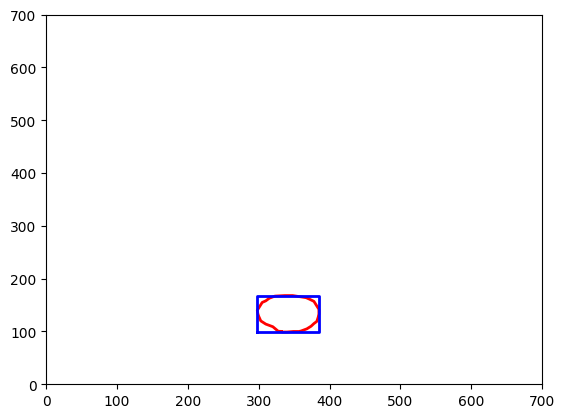

Freehand points: [{'x': 245, 'y': 69} {'x': 240, 'y': 74} {'x': 238, 'y': 81}
 {'x': 238, 'y': 91} {'x': 238, 'y': 99} {'x': 240, 'y': 102}
 {'x': 247, 'y': 106} {'x': 251, 'y': 108} {'x': 255, 'y': 111}
 {'x': 260, 'y': 113} {'x': 263, 'y': 116} {'x': 270, 'y': 121}
 {'x': 283, 'y': 125} {'x': 290, 'y': 128} {'x': 294, 'y': 131}
 {'x': 299, 'y': 133} {'x': 305, 'y': 135} {'x': 310, 'y': 136}
 {'x': 318, 'y': 137} {'x': 323, 'y': 135} {'x': 327, 'y': 131}
 {'x': 333, 'y': 126} {'x': 333, 'y': 124} {'x': 335, 'y': 116}
 {'x': 335, 'y': 109} {'x': 330, 'y': 103} {'x': 327, 'y': 101}
 {'x': 322, 'y': 98} {'x': 310, 'y': 94} {'x': 304, 'y': 89}
 {'x': 297, 'y': 83} {'x': 289, 'y': 82} {'x': 282, 'y': 82}
 {'x': 276, 'y': 81} {'x': 269, 'y': 79} {'x': 264, 'y': 75}
 {'x': 258, 'y': 74} {'x': 252, 'y': 69} {'x': 246, 'y': 68}
 {'x': 243, 'y': 68}]
Bounding box: BoundingBox(238, 335, 68, 137)


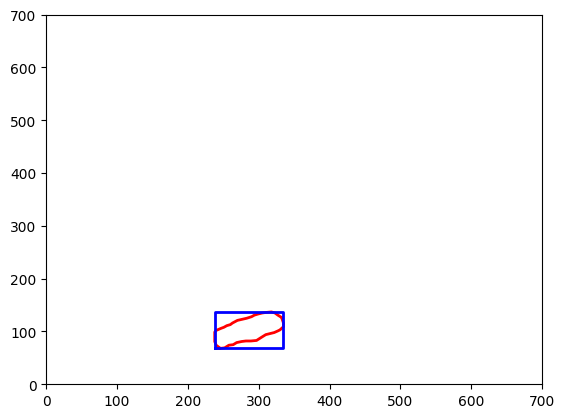

Freehand points: [{'x': 274, 'y': 45} {'x': 254, 'y': 47} {'x': 239, 'y': 50}
 {'x': 221, 'y': 51} {'x': 202, 'y': 52} {'x': 189, 'y': 54}
 {'x': 181, 'y': 61} {'x': 178, 'y': 68} {'x': 175, 'y': 75}
 {'x': 174, 'y': 83} {'x': 169, 'y': 107} {'x': 169, 'y': 116}
 {'x': 169, 'y': 125} {'x': 169, 'y': 128} {'x': 171, 'y': 144}
 {'x': 175, 'y': 151} {'x': 179, 'y': 160} {'x': 185, 'y': 168}
 {'x': 188, 'y': 174} {'x': 195, 'y': 183} {'x': 197, 'y': 198}
 {'x': 215, 'y': 218} {'x': 218, 'y': 235} {'x': 222, 'y': 240}
 {'x': 237, 'y': 250} {'x': 260, 'y': 257} {'x': 284, 'y': 260}
 {'x': 293, 'y': 260} {'x': 305, 'y': 260} {'x': 310, 'y': 259}
 {'x': 324, 'y': 256} {'x': 334, 'y': 244} {'x': 337, 'y': 239}
 {'x': 347, 'y': 226} {'x': 354, 'y': 220} {'x': 364, 'y': 202}
 {'x': 371, 'y': 191} {'x': 382, 'y': 182} {'x': 394, 'y': 148}
 {'x': 394, 'y': 135} {'x': 393, 'y': 120} {'x': 392, 'y': 108}
 {'x': 392, 'y': 94} {'x': 387, 'y': 82} {'x': 381, 'y': 74}
 {'x': 372, 'y': 66} {'x': 364, 'y':

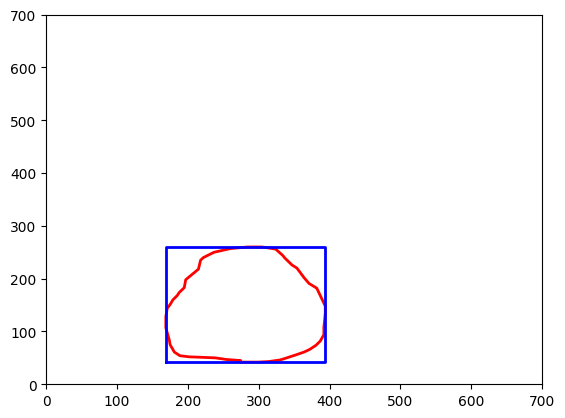

Freehand points: [{'x': 395, 'y': 65} {'x': 391, 'y': 58} {'x': 387, 'y': 51}
 {'x': 383, 'y': 48} {'x': 369, 'y': 41} {'x': 363, 'y': 39}
 {'x': 354, 'y': 38} {'x': 345, 'y': 36} {'x': 334, 'y': 32}
 {'x': 328, 'y': 31} {'x': 316, 'y': 30} {'x': 306, 'y': 30}
 {'x': 294, 'y': 30} {'x': 280, 'y': 29} {'x': 268, 'y': 28}
 {'x': 256, 'y': 27} {'x': 242, 'y': 26} {'x': 231, 'y': 26}
 {'x': 215, 'y': 26} {'x': 201, 'y': 26} {'x': 183, 'y': 30}
 {'x': 173, 'y': 34} {'x': 164, 'y': 43} {'x': 156, 'y': 47}
 {'x': 155, 'y': 52} {'x': 154, 'y': 191} {'x': 159, 'y': 193}
 {'x': 164, 'y': 197} {'x': 166, 'y': 199} {'x': 168, 'y': 199}
 {'x': 192, 'y': 208} {'x': 204, 'y': 213} {'x': 211, 'y': 217}
 {'x': 220, 'y': 220} {'x': 234, 'y': 227} {'x': 242, 'y': 231}
 {'x': 245, 'y': 235} {'x': 270, 'y': 243} {'x': 284, 'y': 247}
 {'x': 296, 'y': 252} {'x': 304, 'y': 255} {'x': 313, 'y': 258}
 {'x': 318, 'y': 260} {'x': 327, 'y': 260} {'x': 348, 'y': 261}
 {'x': 358, 'y': 261} {'x': 362, 'y': 259} {'x':

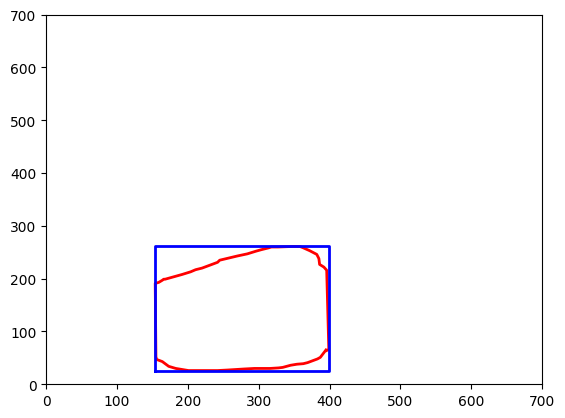

Freehand points: [{'x': 403, 'y': 94} {'x': 396, 'y': 97} {'x': 389, 'y': 104}
 {'x': 380, 'y': 115} {'x': 376, 'y': 120} {'x': 374, 'y': 126}
 {'x': 374, 'y': 130} {'x': 376, 'y': 136} {'x': 384, 'y': 140}
 {'x': 388, 'y': 144} {'x': 389, 'y': 147} {'x': 392, 'y': 151}
 {'x': 401, 'y': 156} {'x': 409, 'y': 160} {'x': 413, 'y': 162}
 {'x': 418, 'y': 164} {'x': 431, 'y': 166} {'x': 439, 'y': 165}
 {'x': 446, 'y': 162} {'x': 452, 'y': 158} {'x': 458, 'y': 151}
 {'x': 459, 'y': 148} {'x': 461, 'y': 131} {'x': 459, 'y': 123}
 {'x': 453, 'y': 119} {'x': 448, 'y': 113} {'x': 441, 'y': 108}
 {'x': 440, 'y': 105} {'x': 436, 'y': 101} {'x': 434, 'y': 98}
 {'x': 428, 'y': 94} {'x': 420, 'y': 90} {'x': 413, 'y': 89}
 {'x': 403, 'y': 94}]
Bounding box: BoundingBox(374, 461, 89, 166)


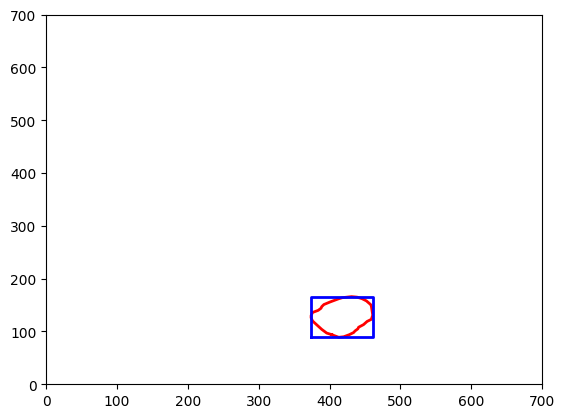

Freehand points: [{'x': 150, 'y': 103} {'x': 141, 'y': 107} {'x': 133, 'y': 118}
 {'x': 129, 'y': 126} {'x': 123, 'y': 134} {'x': 115, 'y': 138}
 {'x': 112, 'y': 144} {'x': 112, 'y': 151} {'x': 112, 'y': 158}
 {'x': 119, 'y': 165} {'x': 124, 'y': 168} {'x': 166, 'y': 172}
 {'x': 179, 'y': 172} {'x': 180, 'y': 172} {'x': 186, 'y': 170}
 {'x': 189, 'y': 165} {'x': 192, 'y': 156} {'x': 193, 'y': 143}
 {'x': 193, 'y': 137} {'x': 193, 'y': 132} {'x': 190, 'y': 129}
 {'x': 185, 'y': 125} {'x': 182, 'y': 121} {'x': 176, 'y': 116}
 {'x': 170, 'y': 114} {'x': 162, 'y': 112} {'x': 160, 'y': 105}
 {'x': 157, 'y': 103} {'x': 151, 'y': 102} {'x': 147, 'y': 102}]
Bounding box: BoundingBox(112, 193, 102, 172)


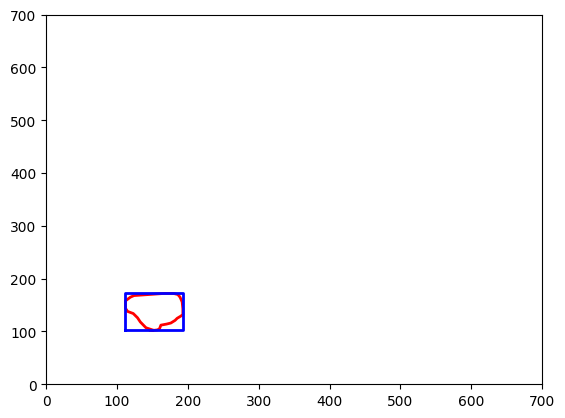

Freehand points: [{'x': 265, 'y': 78} {'x': 258, 'y': 69} {'x': 251, 'y': 65}
 {'x': 237, 'y': 61} {'x': 226, 'y': 58} {'x': 216, 'y': 52}
 {'x': 210, 'y': 49} {'x': 203, 'y': 45} {'x': 198, 'y': 44}
 {'x': 193, 'y': 44} {'x': 180, 'y': 42} {'x': 167, 'y': 43}
 {'x': 162, 'y': 43} {'x': 149, 'y': 42} {'x': 140, 'y': 41}
 {'x': 128, 'y': 38} {'x': 116, 'y': 37} {'x': 101, 'y': 36}
 {'x': 93, 'y': 36} {'x': 66, 'y': 45} {'x': 60, 'y': 49}
 {'x': 45, 'y': 76} {'x': 43, 'y': 86} {'x': 40, 'y': 90}
 {'x': 39, 'y': 97} {'x': 39, 'y': 102} {'x': 38, 'y': 133}
 {'x': 51, 'y': 147} {'x': 69, 'y': 156} {'x': 80, 'y': 159}
 {'x': 87, 'y': 163} {'x': 95, 'y': 168} {'x': 104, 'y': 171}
 {'x': 134, 'y': 184} {'x': 149, 'y': 188} {'x': 157, 'y': 189}
 {'x': 168, 'y': 192} {'x': 193, 'y': 185} {'x': 197, 'y': 182}
 {'x': 201, 'y': 178} {'x': 205, 'y': 176} {'x': 211, 'y': 172}
 {'x': 219, 'y': 164} {'x': 229, 'y': 160} {'x': 231, 'y': 160}
 {'x': 246, 'y': 139} {'x': 254, 'y': 134} {'x': 255, 'y': 126

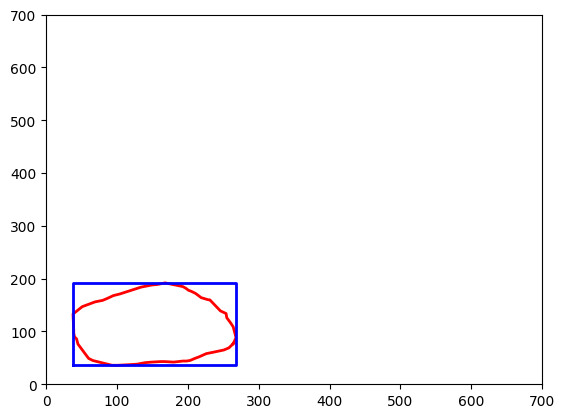

Freehand points: [{'x': 486, 'y': 118} {'x': 488, 'y': 105} {'x': 489, 'y': 99}
 {'x': 485, 'y': 92} {'x': 481, 'y': 88} {'x': 475, 'y': 79}
 {'x': 468, 'y': 75} {'x': 458, 'y': 73} {'x': 450, 'y': 71}
 {'x': 441, 'y': 65} {'x': 434, 'y': 64} {'x': 425, 'y': 60}
 {'x': 413, 'y': 57} {'x': 402, 'y': 57} {'x': 394, 'y': 56}
 {'x': 380, 'y': 56} {'x': 375, 'y': 56} {'x': 367, 'y': 56}
 {'x': 342, 'y': 63} {'x': 337, 'y': 64} {'x': 324, 'y': 69}
 {'x': 314, 'y': 76} {'x': 310, 'y': 80} {'x': 308, 'y': 82}
 {'x': 302, 'y': 98} {'x': 300, 'y': 109} {'x': 300, 'y': 116}
 {'x': 300, 'y': 116} {'x': 306, 'y': 151} {'x': 336, 'y': 169}
 {'x': 347, 'y': 171} {'x': 359, 'y': 176} {'x': 380, 'y': 193}
 {'x': 380, 'y': 199} {'x': 380, 'y': 209} {'x': 383, 'y': 212}
 {'x': 396, 'y': 216} {'x': 421, 'y': 221} {'x': 427, 'y': 222}
 {'x': 439, 'y': 222} {'x': 464, 'y': 215} {'x': 465, 'y': 197}
 {'x': 472, 'y': 180} {'x': 472, 'y': 168} {'x': 471, 'y': 162}
 {'x': 470, 'y': 149} {'x': 473, 'y': 140} {'x

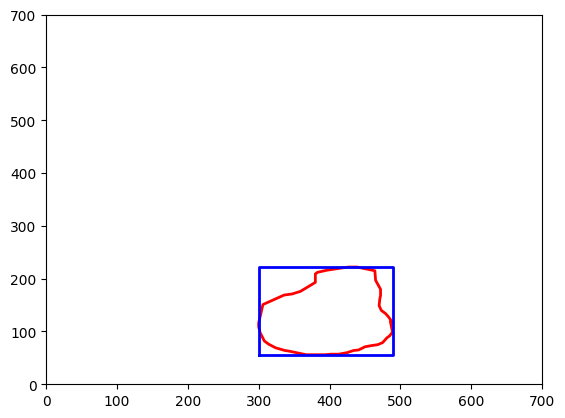

Freehand points: [{'x': 303, 'y': 126} {'x': 309, 'y': 138} {'x': 315, 'y': 147}
 {'x': 316, 'y': 158} {'x': 314, 'y': 168} {'x': 301, 'y': 180}
 {'x': 287, 'y': 183} {'x': 274, 'y': 185} {'x': 257, 'y': 186}
 {'x': 245, 'y': 184} {'x': 241, 'y': 179} {'x': 233, 'y': 172}
 {'x': 226, 'y': 164} {'x': 226, 'y': 162} {'x': 220, 'y': 146}
 {'x': 221, 'y': 141} {'x': 231, 'y': 135} {'x': 243, 'y': 129}
 {'x': 253, 'y': 125} {'x': 274, 'y': 121} {'x': 286, 'y': 121}
 {'x': 291, 'y': 122} {'x': 301, 'y': 125} {'x': 305, 'y': 128}]
Bounding box: BoundingBox(220, 316, 121, 186)


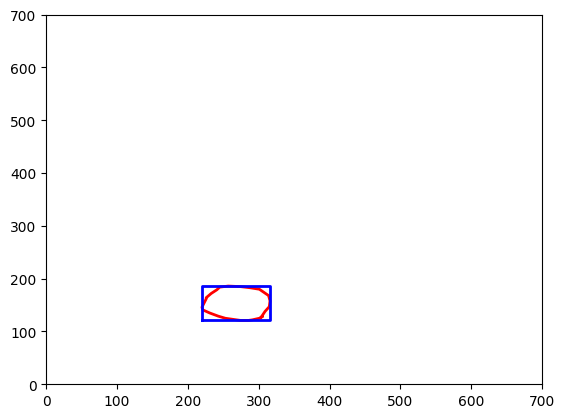

Freehand points: [{'x': 216, 'y': 219} {'x': 244, 'y': 170}]
Bounding box: BoundingBox(216, 244, 170, 219)


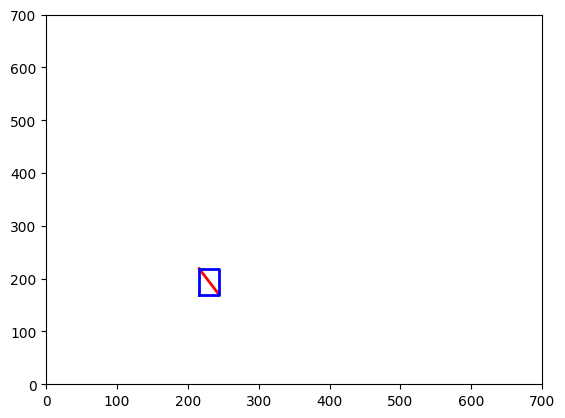

Freehand points: [{'x': 167, 'y': 100} {'x': 171, 'y': 97} {'x': 175, 'y': 94}
 {'x': 184, 'y': 87} {'x': 192, 'y': 85} {'x': 200, 'y': 85}
 {'x': 210, 'y': 84} {'x': 216, 'y': 83} {'x': 223, 'y': 82}
 {'x': 239, 'y': 81} {'x': 243, 'y': 80} {'x': 245, 'y': 80}
 {'x': 249, 'y': 81} {'x': 253, 'y': 82} {'x': 268, 'y': 80}
 {'x': 276, 'y': 80} {'x': 280, 'y': 80} {'x': 290, 'y': 81}
 {'x': 298, 'y': 85} {'x': 299, 'y': 87} {'x': 303, 'y': 94}
 {'x': 303, 'y': 102} {'x': 298, 'y': 115} {'x': 293, 'y': 129}
 {'x': 289, 'y': 137} {'x': 284, 'y': 149} {'x': 281, 'y': 158}
 {'x': 276, 'y': 163} {'x': 274, 'y': 166} {'x': 255, 'y': 173}
 {'x': 253, 'y': 173} {'x': 242, 'y': 173} {'x': 239, 'y': 170}
 {'x': 238, 'y': 162} {'x': 233, 'y': 156} {'x': 231, 'y': 154}
 {'x': 229, 'y': 152} {'x': 227, 'y': 150} {'x': 224, 'y': 148}
 {'x': 221, 'y': 145} {'x': 216, 'y': 139} {'x': 212, 'y': 139}
 {'x': 208, 'y': 139} {'x': 203, 'y': 139} {'x': 200, 'y': 139}
 {'x': 194, 'y': 136} {'x': 189, 'y': 132} 

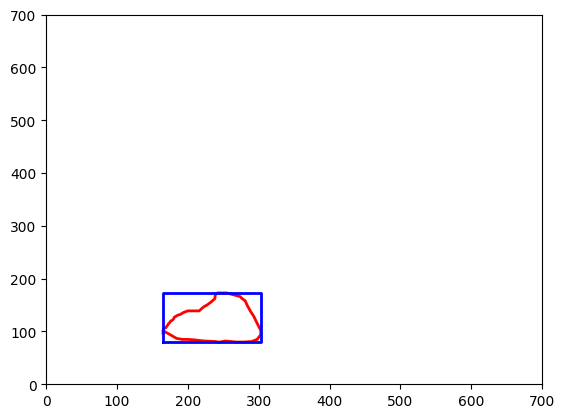

Freehand points: [{'x': 279, 'y': 246} {'x': 245, 'y': 141}]
Bounding box: BoundingBox(245, 279, 141, 246)


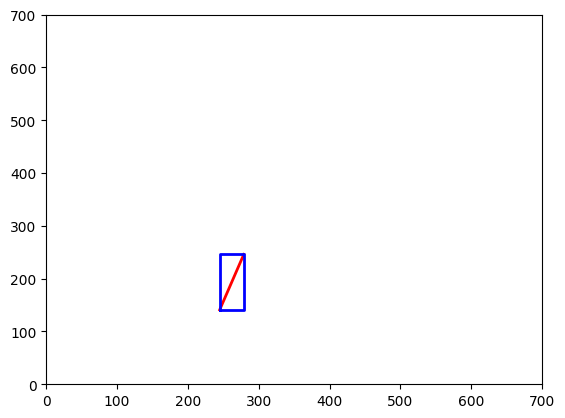

Freehand points: [{'x': 193, 'y': 115} {'x': 187, 'y': 114} {'x': 179, 'y': 112}
 {'x': 164, 'y': 114} {'x': 154, 'y': 119} {'x': 150, 'y': 120}
 {'x': 140, 'y': 129} {'x': 136, 'y': 133} {'x': 132, 'y': 139}
 {'x': 128, 'y': 152} {'x': 128, 'y': 154} {'x': 129, 'y': 172}
 {'x': 130, 'y': 179} {'x': 130, 'y': 187} {'x': 132, 'y': 190}
 {'x': 137, 'y': 193} {'x': 146, 'y': 194} {'x': 152, 'y': 194}
 {'x': 160, 'y': 195} {'x': 176, 'y': 187} {'x': 180, 'y': 183}
 {'x': 187, 'y': 179} {'x': 192, 'y': 175} {'x': 200, 'y': 171}
 {'x': 203, 'y': 166} {'x': 205, 'y': 161} {'x': 207, 'y': 152}
 {'x': 207, 'y': 140} {'x': 206, 'y': 132} {'x': 202, 'y': 129}
 {'x': 200, 'y': 124} {'x': 199, 'y': 122} {'x': 195, 'y': 119}
 {'x': 192, 'y': 116}]
Bounding box: BoundingBox(128, 207, 112, 195)


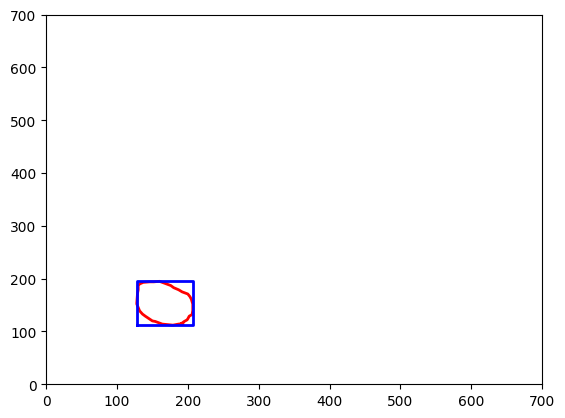

Freehand points: [{'x': 410, 'y': 97} {'x': 400, 'y': 97} {'x': 395, 'y': 100}
 {'x': 386, 'y': 107} {'x': 377, 'y': 114} {'x': 371, 'y': 120}
 {'x': 371, 'y': 121} {'x': 369, 'y': 133} {'x': 371, 'y': 139}
 {'x': 373, 'y': 142} {'x': 373, 'y': 149} {'x': 372, 'y': 154}
 {'x': 371, 'y': 159} {'x': 374, 'y': 164} {'x': 379, 'y': 167}
 {'x': 386, 'y': 171} {'x': 403, 'y': 179} {'x': 408, 'y': 178}
 {'x': 413, 'y': 175} {'x': 445, 'y': 166} {'x': 448, 'y': 160}
 {'x': 450, 'y': 152} {'x': 452, 'y': 145} {'x': 447, 'y': 128}
 {'x': 446, 'y': 124} {'x': 446, 'y': 115} {'x': 441, 'y': 111}
 {'x': 431, 'y': 108} {'x': 427, 'y': 104} {'x': 423, 'y': 101}
 {'x': 419, 'y': 98} {'x': 415, 'y': 97} {'x': 408, 'y': 96}]
Bounding box: BoundingBox(369, 452, 96, 179)


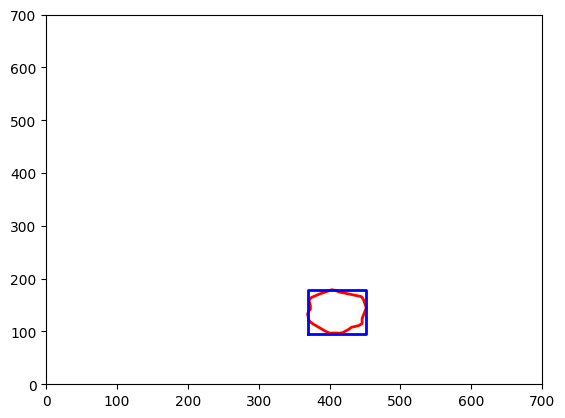

Freehand points: [{'x': 301, 'y': 122} {'x': 288, 'y': 121} {'x': 284, 'y': 120}
 {'x': 277, 'y': 118} {'x': 269, 'y': 116} {'x': 259, 'y': 115}
 {'x': 245, 'y': 116} {'x': 238, 'y': 118} {'x': 230, 'y': 122}
 {'x': 226, 'y': 129} {'x': 221, 'y': 139} {'x': 221, 'y': 139}
 {'x': 218, 'y': 147} {'x': 215, 'y': 154} {'x': 214, 'y': 156}
 {'x': 210, 'y': 163} {'x': 209, 'y': 172} {'x': 206, 'y': 179}
 {'x': 206, 'y': 180} {'x': 205, 'y': 186} {'x': 205, 'y': 195}
 {'x': 209, 'y': 205} {'x': 219, 'y': 217} {'x': 225, 'y': 221}
 {'x': 237, 'y': 223} {'x': 245, 'y': 224} {'x': 255, 'y': 228}
 {'x': 262, 'y': 229} {'x': 282, 'y': 229} {'x': 290, 'y': 226}
 {'x': 298, 'y': 225} {'x': 308, 'y': 225} {'x': 316, 'y': 225}
 {'x': 320, 'y': 224} {'x': 320, 'y': 224} {'x': 323, 'y': 212}
 {'x': 334, 'y': 181} {'x': 335, 'y': 173} {'x': 335, 'y': 164}
 {'x': 335, 'y': 157} {'x': 333, 'y': 151} {'x': 328, 'y': 147}
 {'x': 320, 'y': 139} {'x': 315, 'y': 131} {'x': 306, 'y': 123}
 {'x': 303, 'y': 122}]


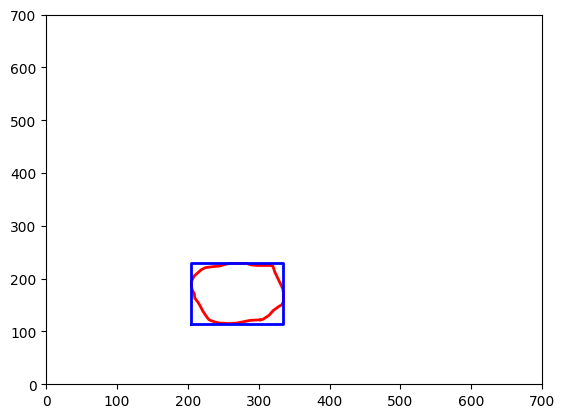

JSONDecodeError: ignored

In [6]:
import glob
import json
import os
import xml.etree.cElementTree as ET

# Change paths to train/validation accordingly
SOURCE_FILE_PATH = "/content/drive/My Drive/thyroid_nodule_detection/dataset/dataset/" 
TARGET_JSON_FILE_PATH = "/content/drive/My Drive/thyroid_nodule_detection/Freehand to Bounding Box Conversion Fix/fixed_labels/data.json"



# [ymin, xmin, ymax, xmax]
def xml_to_json(path):
    temp_cases = []  # dictionary case object list
    xml_files = glob.glob(path + '/*.xml', recursive=True)
    for xml_file in xml_files:
        temp = xml_file.split('/')
        file_name = temp[len(temp) - 1][:-4]
        tree = ET.parse(xml_file)
        root = tree.getroot()
        images = root.findall('mark')

        for image in images:
            if root.find('tirads').text is None:
              continue
            
            number = image.find('image').text
            image_id = file_name + '_' + number

            temp_bboxes = image.find('svg').text
            bounding_boxes = create_bounding_box(temp_bboxes)

            bboxes = []
            if bounding_boxes is not None:
                for bounding_box in bounding_boxes:
                    bbox = {
                        'x': bounding_box['minx'],
                        'y': bounding_box['miny'],
                        'w': bounding_box['maxx'] - bounding_box['minx'],
                        'h': bounding_box['maxy'] - bounding_box['miny'],
                    }
                    bboxes.append(bbox)
                case = {
                        'case_id': image_id,
                        'tirads': root.find('tirads').text,
                        'bboxes': bboxes,
                        'age': root.find('age').text,
                        'sex': root.find('sex').text,
                        'composition': root.find('composition').text,
                        'echogenicity': root.find('echogenicity').text,
                        'margins': root.find('margins').text,
                        'calcifications': root.find('calcifications').text,
                        'tirads': root.find('tirads').text,
                        'reportbacaf': root.find('reportbacaf').text,
                        'reporteco': root.find('reporteco').text,
                }
                temp_cases.append(case)

    cases = {
        'cases': temp_cases
    }
    save_json(json.dumps(cases))


def save_json(final_json):
    text_file = open(TARGET_JSON_FILE_PATH, "w")
    text_file.write(final_json)
    text_file.close()


def main():
    xml_to_json(SOURCE_FILE_PATH)


main()